#  Step 1: Pulling out headlines from Stock news API tickertick
Importing the packages required 

In [1]:
import requests
import json
from bs4 import BeautifulSoup

### Loading news headlines data from the API in json format

<article class="markdown-body entry-content" itemprop="text"><h2><a id="user-content-introduction" class="anchor" aria-hidden="true" href="#introduction"><svg class="octicon octicon-link" viewBox="0 0 16 16" version="1.1" width="16" height="16" aria-hidden="true"><path fill-rule="evenodd" d="M4 9h1v1H4c-1.5 0-3-1.69-3-3.5S2.55 3 4 3h4c1.45 0 3 1.69 3 3.5 0 1.41-.91 2.72-2 3.25V8.59c.58-.45 1-1.27 1-2.09C10 5.22 8.98 4 8 4H4c-.98 0-2 1.22-2 2.5S3 9 4 9zm9-3h-1v1h1c1 0 2 1.22 2 2.5S13.98 12 13 12H9c-.98 0-2-1.22-2-2.5 0-.83.42-1.64 1-2.09V6.25c-1.09.53-2 1.84-2 3.25C6 11.31 7.55 13 9 13h4c1.45 0 3-1.69 3-3.5S14.5 6 13 6z"></path></svg></a>Introduction</h2>

<p>All requests to the TickerTick API are made via GET to <code>https://api.tickertick.com/</code>.</p>
<p>Below are the available endpoints:</p>
<h2><a id="user-content-get-stock-news-feed-api" class="anchor" aria-hidden="true" href="#get-stock-news-feed-api"><svg class="octicon octicon-link" viewBox="0 0 16 16" version="1.1" width="16" height="16" aria-hidden="true"><path fill-rule="evenodd" d="M4 9h1v1H4c-1.5 0-3-1.69-3-3.5S2.55 3 4 3h4c1.45 0 3 1.69 3 3.5 0 1.41-.91 2.72-2 3.25V8.59c.58-.45 1-1.27 1-2.09C10 5.22 8.98 4 8 4H4c-.98 0-2 1.22-2 2.5S3 9 4 9zm9-3h-1v1h1c1 0 2 1.22 2 2.5S13.98 12 13 12H9c-.98 0-2-1.22-2-2.5 0-.83.42-1.64 1-2.09V6.25c-1.09.53-2 1.84-2 3.25C6 11.31 7.55 13 9 13h4c1.45 0 3-1.69 3-3.5S14.5 6 13 6z"></path></svg></a>Get stock news feed API</h2>
<p>This API returns a feed of the lastest news stories relevant to the query in reverse chronological order.</p>
<h3><a id="user-content-endpoint" class="anchor" aria-hidden="true" href="#endpoint"><svg class="octicon octicon-link" viewBox="0 0 16 16" version="1.1" width="16" height="16" aria-hidden="true"><path fill-rule="evenodd" d="M4 9h1v1H4c-1.5 0-3-1.69-3-3.5S2.55 3 4 3h4c1.45 0 3 1.69 3 3.5 0 1.41-.91 2.72-2 3.25V8.59c.58-.45 1-1.27 1-2.09C10 5.22 8.98 4 8 4H4c-.98 0-2 1.22-2 2.5S3 9 4 9zm9-3h-1v1h1c1 0 2 1.22 2 2.5S13.98 12 13 12H9c-.98 0-2-1.22-2-2.5 0-.83.42-1.64 1-2.09V6.25c-1.09.53-2 1.84-2 3.25C6 11.31 7.55 13 9 13h4c1.45 0 3-1.69 3-3.5S14.5 6 13 6z"></path></svg></a>Endpoint</h3>
<p><code>GET</code> <a href="https://api.tickertick.com/feed" rel="nofollow">https://api.tickertick.com/feed</a></p>
<h3><a id="user-content-example-request-url" class="anchor" aria-hidden="true" href="#example-request-url"><svg class="octicon octicon-link" viewBox="0 0 16 16" version="1.1" width="16" height="16" aria-hidden="true"><path fill-rule="evenodd" d="M4 9h1v1H4c-1.5 0-3-1.69-3-3.5S2.55 3 4 3h4c1.45 0 3 1.69 3 3.5 0 1.41-.91 2.72-2 3.25V8.59c.58-.45 1-1.27 1-2.09C10 5.22 8.98 4 8 4H4c-.98 0-2 1.22-2 2.5S3 9 4 9zm9-3h-1v1h1c1 0 2 1.22 2 2.5S13.98 12 13 12H9c-.98 0-2-1.22-2-2.5 0-.83.42-1.64 1-2.09V6.25c-1.09.53-2 1.84-2 3.25C6 11.31 7.55 13 9 13h4c1.45 0 3-1.69 3-3.5S14.5 6 13 6z"></path></svg></a>Example request URL</h3>
<p>Stock news feed for Apple Inc. - <a href="https://api.tickertick.com/feed?q=f3:aapl&amp;lang=en" rel="nofollow">https://api.tickertick.com/feed?q=f3:aapl&amp;lang=en</a></p>
<p><a href="https://tickertick.netlify.com/?q=AAPL" rel="nofollow">Rendered stock news feed for Apple Inc.</a></p>
<h3><a id="user-content-parameters" class="anchor" aria-hidden="true" href="#parameters"><svg class="octicon octicon-link" viewBox="0 0 16 16" version="1.1" width="16" height="16" aria-hidden="true"><path fill-rule="evenodd" d="M4 9h1v1H4c-1.5 0-3-1.69-3-3.5S2.55 3 4 3h4c1.45 0 3 1.69 3 3.5 0 1.41-.91 2.72-2 3.25V8.59c.58-.45 1-1.27 1-2.09C10 5.22 8.98 4 8 4H4c-.98 0-2 1.22-2 2.5S3 9 4 9zm9-3h-1v1h1c1 0 2 1.22 2 2.5S13.98 12 13 12H9c-.98 0-2-1.22-2-2.5 0-.83.42-1.64 1-2.09V6.25c-1.09.53-2 1.84-2 3.25C6 11.31 7.55 13 9 13h4c1.45 0 3-1.69 3-3.5S14.5 6 13 6z"></path></svg></a>Parameters</h3>
<table>
<thead>
<tr>
<th>Parameter</th>
<th>Description</th>
<th>Options</th>
<th>Example value</th>
</tr>
</thead>
<tbody>
<tr>
<td>q</td>
<td>The query string</td>
<td>Any query string in a query language<br>(explained below)</td>
<td><code>f3:aapl</code></td>
</tr>
<tr>
<td>lang</td>
<td>The language of the returned news stories</td>
<td>en: English<br>cn: Chinese<br>en,cn: Both</td>
<td><code>en,cn</code></td>
</tr>
<tr>
<td>n</td>
<td>How many latest news stories to fetch</td>
<td>Any number between 1 and 1000</td>
<td><code>42</code></td>
</tr>
<tr>
<td>last</td>
<td>A story id for pagination.<br>Fetch news stories older than the story with this id.</td>
<td>A 64 bit integer. Each returned news story has such an id.</td>
<td><code>6844326865886118959</code></td>
</tr>
</tbody>
</table>
<h3><a id="user-content-the-query-language" class="anchor" aria-hidden="true" href="#the-query-language"><svg class="octicon octicon-link" viewBox="0 0 16 16" version="1.1" width="16" height="16" aria-hidden="true"><path fill-rule="evenodd" d="M4 9h1v1H4c-1.5 0-3-1.69-3-3.5S2.55 3 4 3h4c1.45 0 3 1.69 3 3.5 0 1.41-.91 2.72-2 3.25V8.59c.58-.45 1-1.27 1-2.09C10 5.22 8.98 4 8 4H4c-.98 0-2 1.22-2 2.5S3 9 4 9zm9-3h-1v1h1c1 0 2 1.22 2 2.5S13.98 12 13 12H9c-.98 0-2-1.22-2-2.5 0-.83.42-1.64 1-2.09V6.25c-1.09.53-2 1.84-2 3.25C6 11.31 7.55 13 9 13h4c1.45 0 3-1.69 3-3.5S14.5 6 13 6z"></path></svg></a>The query language</h3>
<p>The query language is a <a href="https://en.wikipedia.org/wiki/Context-free_language" rel="nofollow">Context free language</a> following the grammar below</p>
<pre><code>query =&gt; term | (and query_list) | (or query_list) | (diff query query)

query_list =&gt; query query_list | term

term =&gt; f_term:any_stock_ticker | tx:any_string | s:any_website_domain_name

f_term =&gt; f0 | f1 | f2 | f3

</code></pre>
<h3><a id="user-content-operator-semantics" class="anchor" aria-hidden="true" href="#operator-semantics"><svg class="octicon octicon-link" viewBox="0 0 16 16" version="1.1" width="16" height="16" aria-hidden="true"><path fill-rule="evenodd" d="M4 9h1v1H4c-1.5 0-3-1.69-3-3.5S2.55 3 4 3h4c1.45 0 3 1.69 3 3.5 0 1.41-.91 2.72-2 3.25V8.59c.58-.45 1-1.27 1-2.09C10 5.22 8.98 4 8 4H4c-.98 0-2 1.22-2 2.5S3 9 4 9zm9-3h-1v1h1c1 0 2 1.22 2 2.5S13.98 12 13 12H9c-.98 0-2-1.22-2-2.5 0-.83.42-1.64 1-2.09V6.25c-1.09.53-2 1.84-2 3.25C6 11.31 7.55 13 9 13h4c1.45 0 3-1.69 3-3.5S14.5 6 13 6z"></path></svg></a>Operator semantics</h3>
<table>
<thead>
<tr>
<th>operator</th>
<th>semantics</th>
</tr>
</thead>
<tbody>
<tr>
<td><code>(and query_list)</code></td>
<td>request news stories matching all queries in <code>query_list</code></td>
</tr>
<tr>
<td><code>(or query_list)</code></td>
<td>request news stories matching any query in <code>query_list</code></td>
</tr>
<tr>
<td><code>(diff query1 query2)</code></td>
<td>request news stories matching <code>query1</code> but not <code>query2</code></td>
</tr>
</tbody>
</table>
<h3><a id="user-content-term-semantics" class="anchor" aria-hidden="true" href="#term-semantics"><svg class="octicon octicon-link" viewBox="0 0 16 16" version="1.1" width="16" height="16" aria-hidden="true"><path fill-rule="evenodd" d="M4 9h1v1H4c-1.5 0-3-1.69-3-3.5S2.55 3 4 3h4c1.45 0 3 1.69 3 3.5 0 1.41-.91 2.72-2 3.25V8.59c.58-.45 1-1.27 1-2.09C10 5.22 8.98 4 8 4H4c-.98 0-2 1.22-2 2.5S3 9 4 9zm9-3h-1v1h1c1 0 2 1.22 2 2.5S13.98 12 13 12H9c-.98 0-2-1.22-2-2.5 0-.83.42-1.64 1-2.09V6.25c-1.09.53-2 1.84-2 3.25C6 11.31 7.55 13 9 13h4c1.45 0 3-1.69 3-3.5S14.5 6 13 6z"></path></svg></a>Term semantics</h3>
<table>
<thead>
<tr>
<th>term</th>
<th>semantics</th>
</tr>
</thead>
<tbody>
<tr>
<td><code>f0:stock_ticker</code></td>
<td>Request company filings only about <code>stock_ticker</code></td>
</tr>
<tr>
<td><code>f1:stock_ticker</code></td>
<td>Request most relevant stories about <code>stock_ticker</code></td>
</tr>
<tr>
<td><code>f2:stock_ticker</code></td>
<td>Request most relevant and medium relevant stories about <code>stock_ticker</code></td>
</tr>
<tr>
<td><code>f3:stock_ticker</code></td>
<td>Request all stories about <code>stock_ticker</code></td>
</tr>
<tr>
<td><code>tx:any_string</code></td>
<td>request news story matching text <code>any_string</code>. <br> (<code>any_string</code> can have whitespaces)</td>
</tr>
<tr>
<td><code>s:domain_name</code></td>
<td>request news story from websites on domain <code>domain_name</code> <br> (<code>domain_name</code> shouldn't contain '.' or '/')</td>
</tr>
</tbody>
</table>
<h3><a id="user-content-example-queries" class="anchor" aria-hidden="true" href="#example-queries"><svg class="octicon octicon-link" viewBox="0 0 16 16" version="1.1" width="16" height="16" aria-hidden="true"><path fill-rule="evenodd" d="M4 9h1v1H4c-1.5 0-3-1.69-3-3.5S2.55 3 4 3h4c1.45 0 3 1.69 3 3.5 0 1.41-.91 2.72-2 3.25V8.59c.58-.45 1-1.27 1-2.09C10 5.22 8.98 4 8 4H4c-.98 0-2 1.22-2 2.5S3 9 4 9zm9-3h-1v1h1c1 0 2 1.22 2 2.5S13.98 12 13 12H9c-.98 0-2-1.22-2-2.5 0-.83.42-1.64 1-2.09V6.25c-1.09.53-2 1.84-2 3.25C6 11.31 7.55 13 9 13h4c1.45 0 3-1.69 3-3.5S14.5 6 13 6z"></path></svg></a>Example queries</h3>
<table>
<thead>
<tr>
<th>Example query</th>
<th>Semantics</th>
<th>URL</th>
</tr>
</thead>
<tbody>
<tr>
<td><code>f0:aapl</code></td>
<td>Relevant level 0 news stories about Apple Inc. (ticker: aapl)</td>
<td><a href="https://api.tickertick.com/feed?q=f0:aapl" rel="nofollow">https://api.tickertick.com/feed?q=f0:aapl</a></td>
</tr>
<tr>
<td><code>(or f3:fb f3:amzn f3:nflx f3:goog)</code></td>
<td>Relevant level 3 news stories about <a href="https://www.investopedia.com/terms/f/fang-stocks-fb-amzn.asp" rel="nofollow">FANG stocks</a></td>
<td><a href="https://api.tickertick.com/feed?q=(or%20f3:fb%20f3:amzn%20f3:nflx%20f3:goog)" rel="nofollow">https://api.tickertick.com/feed?q=(or%20f3:fb%20f3:amzn%20f3:nflx%20f3:goog)</a></td>
</tr>
<tr>
<td><code>(diff tx:elon musk s:nytimes)</code></td>
<td>Stories about Elon Musk not from NY times</td>
<td><a href="https://api.tickertick.com/feed?q=(diff%20tx:elon%20musk%20s:nytimes)" rel="nofollow">https://api.tickertick.com/feed?q=(diff%20tx:elon%20musk%20s:nytimes)</a></td>
</tr>
</tbody>
</table>
<h3><a id="user-content-the-returned-news-stories" class="anchor" aria-hidden="true" href="#the-returned-news-stories"><svg class="octicon octicon-link" viewBox="0 0 16 16" version="1.1" width="16" height="16" aria-hidden="true"><path fill-rule="evenodd" d="M4 9h1v1H4c-1.5 0-3-1.69-3-3.5S2.55 3 4 3h4c1.45 0 3 1.69 3 3.5 0 1.41-.91 2.72-2 3.25V8.59c.58-.45 1-1.27 1-2.09C10 5.22 8.98 4 8 4H4c-.98 0-2 1.22-2 2.5S3 9 4 9zm9-3h-1v1h1c1 0 2 1.22 2 2.5S13.98 12 13 12H9c-.98 0-2-1.22-2-2.5 0-.83.42-1.64 1-2.09V6.25c-1.09.53-2 1.84-2 3.25C6 11.31 7.55 13 9 13h4c1.45 0 3-1.69 3-3.5S14.5 6 13 6z"></path></svg></a>The returned news stories</h3>
<p>The returned news stories are in a JSON string. The example from URL <a href="https://api.tickertick.com/feed?q=f3:aapl&amp;lang=en&amp;n=2" rel="nofollow">https://api.tickertick.com/feed?q=f3:aapl&amp;lang=en&amp;n=2</a></p>
<pre><code>{
  "stories": [
    {
      "id": "-6182621638785416990",
      "title": "‘The time is now to have a federal privacy bill,’ says Tim Cook",
      "url": "https://www.theverge.com/2019/11/22/20978140/tim-cook-apple-federal-privacy-bill-facebook-breakup-big-tech",
      "site": "www.theverge.com",
      "time": 1574547739000,
      "favicon_url": "https://cdn.vox-cdn.com/uploads/chorus_asset/file/7395351/android-chrome-192x192.0.png"
    },
    {
      "id": "-3255988935767362050",
      "title": "Email App Maker Begs Apple CEO to Get Back on the App Store Author: Julian Chokkattu Julian Chokkattu",
      "url": "https://www.wired.com/story/bluemail-developers-write-open-letter-to-apple-mac-app-store/",
      "site": "www.wired.com",
      "time": 1574547739000,
      "favicon_url": "https://www.wired.com/images/logos/w-icon-512x512.png"
    },
    {
      "id": "4112141090713067885",
      "title": "NYU professor Scott Galloway: Disney+ and Apple TV+ will be the winners of the streaming wars",
      "url": "https://www.businessinsider.com/nyu-professor-scott-galloway-disney-plus-apple-tv-streaming-wars-2019-11",
      "site": "www.businessinsider.com",
      "time": 1574547739000,
      "favicon_url": "http://static.businessinsider.de/assets/images/de/favicons/android-chrome-512x512.png"
    },
  ]
}

</code></pre>
<table>
<thead>
<tr>
<th>Story field</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td><code>id</code></td>
<td>A unique string id of the story. The <code>id</code> can be used for pagination as the value of parameter <code>last</code>.</td>
</tr>
<tr>
<td><code>title</code></td>
<td>The title of the news story in HTML format.</td>
</tr>
<tr>
<td><code>url</code></td>
<td>The url of the news story.</td>
</tr>
<tr>
<td><code>site</code></td>
<td>The source website of the news story.</td>
</tr>
<tr>
<td><code>time</code></td>
<td>The timestamp of the news story. The same semantics as <code>Date.now()</code> in Javascript.</td>
</tr>
<tr>
<td><code>favicon_url</code></td>
<td>The url of the favicon of the source website.</td>
</tr>
</tbody>
</table>
<h3><a id="user-content-top-news-source-websites" class="anchor" aria-hidden="true" href="#top-news-source-websites"><svg class="octicon octicon-link" viewBox="0 0 16 16" version="1.1" width="16" height="16" aria-hidden="true"><path fill-rule="evenodd" d="M4 9h1v1H4c-1.5 0-3-1.69-3-3.5S2.55 3 4 3h4c1.45 0 3 1.69 3 3.5 0 1.41-.91 2.72-2 3.25V8.59c.58-.45 1-1.27 1-2.09C10 5.22 8.98 4 8 4H4c-.98 0-2 1.22-2 2.5S3 9 4 9zm9-3h-1v1h1c1 0 2 1.22 2 2.5S13.98 12 13 12H9c-.98 0-2-1.22-2-2.5 0-.83.42-1.64 1-2.09V6.25c-1.09.53-2 1.84-2 3.25C6 11.31 7.55 13 9 13h4c1.45 0 3-1.69 3-3.5S14.5 6 13 6z"></path></svg>

</article>

## Writing the query for our project
For getting :<br> </br>
All the news with text IBM i.e **tx:ibm** and in english **lang=en and**  getting 342 headlines **n=342** 
<br></br>Also we do not want any news from sec.gov so using **diff**
 <br></br>**final query :** *q=(diff%20tx:ibm%20s:sec.gov)&lang=en&n=342)*

In [2]:
# Use requests library to get the JSON data
JSONDATA = requests.request("GET", "https://api.tickertick.com/feed?q=(diff%20tx:ibm%20s:sec.gov)&lang=en&n=342") #Make sure you include the http part
# Load it with JSON 
data= JSONDATA.json()

### Writing the json data in a csv file named "ibm_342_headlines.csv"

In [4]:
#opening a file
file_name="ibm_342_headlines.csv"
f=open(file_name,"w")
headers="headline,site,timestamp\n"

#Writing into a csv file
f.write(headers)
diff_news=data['stories']
for news in diff_news:
    headline=news['title']
    site=news['site']
    timestamp=news['time']
    f.write(headline.replace(",","|") +"," +site.replace(",","|") +"," + str(timestamp) +"\n")
f.close()

### Manipulating the data extracted in the csv file 
Importing the required packages first 

In [5]:
import pandas as pd
import csv
from textblob import TextBlob
import datetime

In [7]:
df=pd.read_csv("ibm_342_headlines.csv",sep=',',engine='python')
df.head()

,headline,site,timestamp
0,IBM Business Partner Evanston Technology Partn...,www.biospace.com,1587697798000
1,IBM First-Quarter Sales Decline as New CEO Aim...,www.wsj.com,1587513243000
2,IBM Reports Solid Profit but Won’t Forecast th...,www.barrons.com,1587463033000
3,IBM reports Q1 revenue of $17.6B| down 3.4% Yo...,www.cnbc.com,1587414820000
4,Nestlé Expands Use Of IBM Food Trust Blockchai...,www.forbes.com,1587248634000


### Changing the date column and filtering data by the start and the end days 

In [8]:
df['Date']=df.apply(lambda x:datetime.datetime.fromtimestamp(x['timestamp']/1000).date(),axis=1)

#Filtering the headlines for a required period 
from datetime import datetime
start_date = datetime.strptime("2019-08-26",'%Y-%m-%d').date()
end_date = datetime.strptime("2020-04-24",'%Y-%m-%d').date()

after_start_date = df["Date"] >= start_date
before_end_date = df["Date"] <= end_date
between_two_dates = after_start_date & before_end_date
df = df.loc[between_two_dates] #dataframe with filtered dates

In [9]:
df.head()

,headline,site,timestamp,Date
0,IBM Business Partner Evanston Technology Partn...,www.biospace.com,1587697798000,2020-04-24
1,IBM First-Quarter Sales Decline as New CEO Aim...,www.wsj.com,1587513243000,2020-04-22
2,IBM Reports Solid Profit but Won’t Forecast th...,www.barrons.com,1587463033000,2020-04-21
3,IBM reports Q1 revenue of $17.6B| down 3.4% Yo...,www.cnbc.com,1587414820000,2020-04-21
4,Nestlé Expands Use Of IBM Food Trust Blockchai...,www.forbes.com,1587248634000,2020-04-19


### Adding features : polarity and subjectivity of each headline using textblob library of NLP
Adding features like polarity , subjectivity and dropping the column timestamp from the dataset

In [10]:
df['polarity']=df.apply(lambda x:TextBlob(x['headline']).sentiment.polarity,axis=1)
df['subjectivity']=df.apply(lambda x:TextBlob(x['headline']).sentiment.subjectivity,axis=1)
df.drop(['timestamp'],axis=1,inplace=True)

Last five headlines of the data extracted

In [11]:
df.tail()

,headline,site,Date,polarity,subjectivity
335,Red Hat CEO Says Acquisition by IBM Will Help ...,www.wsj.com,2019-08-29,0.250000,0.250000
336,VMware And IBM Go Full Circle To Dominate The ...,www.forbes.com,2019-08-29,0.350000,0.550000
337,"Why IBM""s CIO values IT product design over ""e...",link.ciodive.com,2019-08-29,-0.500000,0.700000
338,VMware announces updates to its digital worksp...,www.zdnet.com,2019-08-28,0.068182,0.227273
339,IBM’s quantum-resistant magnetic tape storage ...,techcrunch.com,2019-08-28,0.000000,0.100000


### Checking whether the news headlines are for the right period 

In [13]:
print(df['Date'].min())
print(df['Date'].max())

2019-08-28
2020-04-24


In [14]:
#Date along with polarity and subjectivity for different headlines
x=df.groupby(by='Date').mean()
x.head()

,polarity,subjectivity
Date,,
2019-08-28,0.034091,0.163636
2019-08-29,0.033333,0.500000
2019-08-30,0.000000,0.000000
2019-08-31,0.000000,0.000000
2019-09-04,0.000000,0.750000


# Step 2: Pulling out the stock data for IBM using Alpha Vantage API

In [16]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import matplotlib.pyplot as plt

alpha_vantage_api_key = "   " #Please put your API key here by signing up on Alpha Vantage

def pull_daily_time_series_alpha_vantage(alpha_vantage_api_key, ticker_name, output_size = "compact"):
   
    #Generate Alpha Vantage time series object
    ts = TimeSeries(key = alpha_vantage_api_key, output_format = 'pandas')
    data, meta_data = ts.get_daily_adjusted(ticker_name, outputsize = output_size)
    data['date_time'] = data.index
    return data, meta_data

ts_data, ts_metadata = pull_daily_time_series_alpha_vantage(alpha_vantage_api_key, ticker_name = "IBM",output_size="full") 

In [17]:
ts_data.head()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient,date_time
date,,,,,,,,,
2000-04-24,102.0,107.19,101.25,106.50,70.6851,8523100.0,0.0,1.0,2000-04-24
2000-04-25,106.5,113.00,106.44,112.50,74.6674,9576400.0,0.0,1.0,2000-04-25
2000-04-26,112.5,113.94,109.00,110.50,73.3399,6182800.0,0.0,1.0,2000-04-26
2000-04-27,109.5,113.12,108.69,110.62,73.4196,6317500.0,0.0,1.0,2000-04-27
2000-04-28,112.0,112.69,110.12,111.50,74.0037,4888600.0,0.0,1.0,2000-04-28


### Keeping the columns open,close,high,low and adjusted close along with the formattted date

In [18]:
#Dropping what is not required
ts_data.drop(columns=['7. dividend amount','8. split coefficient','6. volume'],inplace=True)

In [19]:
import datetime
ts_data.columns=['open','high','low','close','adjusted_close','date']
ts_data.reset_index(drop=True,inplace=True)
ts_data['date']=ts_data.apply(lambda x:x['date'].date(),axis=1)


In [20]:
ts_data.head()

,open,high,low,close,adjusted_close,date
0,102.0,107.19,101.25,106.50,70.6851,2000-04-24
1,106.5,113.00,106.44,112.50,74.6674,2000-04-25
2,112.5,113.94,109.00,110.50,73.3399,2000-04-26
3,109.5,113.12,108.69,110.62,73.4196,2000-04-27
4,112.0,112.69,110.12,111.50,74.0037,2000-04-28


In [21]:
#Start date and end date of stock data extracted from API
print(ts_data['date'].min())
print(ts_data['date'].max())

2000-04-24
2020-04-24


### Filtering the stock data for the required period

In [22]:
#Start date of the headlines and end date of the headlines
#2019-08-24
#2020-04-24

#Creating a dataset having the dates of headlines
from datetime import datetime
start_date = datetime.strptime("2019-08-28",'%Y-%m-%d').date()
end_date = datetime.strptime("2020-04-24",'%Y-%m-%d').date()

after_start_date = ts_data["date"] >= start_date
before_end_date = ts_data["date"] <= end_date
between_two_dates = after_start_date & before_end_date
filtered_dates = ts_data.loc[between_two_dates]

In [24]:
filtered_dates.head()

,open,high,low,close,adjusted_close,date
4867,130.44,132.8900,130.0400,132.76,129.8450,2019-08-28
4868,134.18,135.6900,134.0400,134.88,131.9185,2019-08-29
4869,135.58,136.0700,134.3627,135.53,132.5542,2019-08-30
4870,134.85,134.9013,133.3301,134.10,131.1556,2019-09-03
4871,135.71,136.4300,135.1500,136.32,133.3268,2019-09-04


### Checking whether the stock data is for the right period 

In [25]:
print(filtered_dates['date'].min())
print(filtered_dates['date'].max())

2019-08-28
2020-04-24


# Step 3: Plotting the Stock data and news headlines' polarity ,subjectivity to check relevance 
Importing the packages for plotting

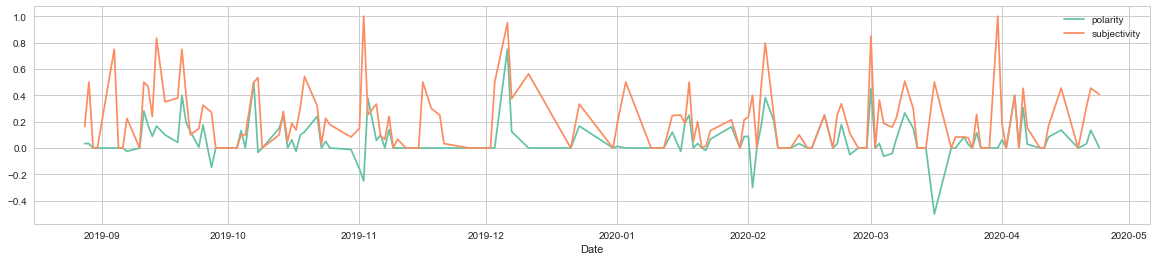

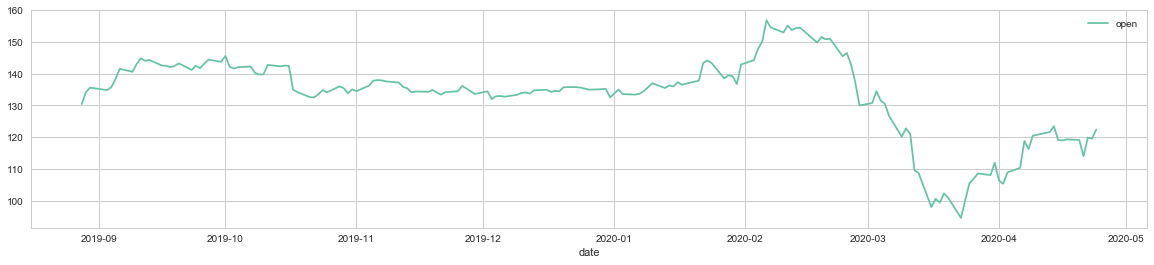

In [57]:
y=filtered_dates[['date','open']]
y=y.set_index('date')
# x has polarity and subjectivity news also
# y has the stock data
import seaborn as sns
sns.set(style="whitegrid",palette='Set2')
x.plot(figsize=(20,4),sharey=True)# headlines
y.plot(figsize=(20,4))# stock data

## Takeaways for the plots

1. The first graph shows polarity that is the sentiment using the headlines whether the price goes up or down or remains the same whereas the subjectivity in the orange shows how much confidence one can have on the predicted polarity. <br></br>
2. The second graph shows the actual stock fluctuation according to the actual opening price stock data fetched from Alpha vantage.


## Efficiency and accuracy
The efficiency of the analysis seems to be quite good specially for a 8 months data.As you can see between the 2020-03 and 2020-04 the IBM stock crashes this is also predicted by the news just before it hits the rock bottom that too with very high subjectivity. 